# Imports

In [1]:
import torch
import torch.nn as nn # all nn modules
import torch.optim as optim # optimization algorithms
import torch.nn.functional as F # activation functions like relu, tanh (all functions with no parameters)
from torch.utils.data import DataLoader # helps with daata
import torchvision.datasets as datasets # has many data sets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Hyperparameters

In [2]:
input_size = 784
num_classes = 10
learning_rate = 0.001
# how many data examples we pass in one iteration
batch_size = 64
epochs = 3

# Load dataset

In [3]:
train_data = datasets.MNIST(root = "data/", train=True, transform=transforms.ToTensor())
# We pass the Dataset as an argument to DataLoader
# This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading
# Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels
train_loader = DataLoader(dataset=train_data, batch_size = batch_size, shuffle=True)

A:\Anacond\envs\deeplearning\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
test_data = datasets.MNIST(root = "data/", train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_data, batch_size = batch_size, shuffle=True)

In [5]:
for X, y in train_loader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [6]:
# for iteration we use loaded data
for data in train_loader: 
    # 64 digits and 64 labels
    print(data)
    break    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
x, y = data[0][0], data[1][0]

In [8]:
print(x)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [9]:
print(y)

tensor(2)


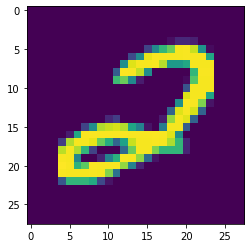

In [10]:
# plt.imshow(data[0][0])
# (1, 28, 28) so plt.imshow() wont work
# so use .view(28, 28)
plt.imshow(data[0][0].view(28, 28))

# To find whether the classes are balanced or not

In [11]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in train_loader:
    Xs, ys =  data
    for y in ys:
        # increase the count of corresponding class by 1
        counter_dict[int(y)] +=1
        total +=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


# We can see the classes are well balanced

In [12]:
for i in counter_dict:
    # percentages of class in the dataet
    print(f"{i}: {counter_dict[i]/total*100:.3f}")

0: 9.872
1: 11.237
2: 9.930
3: 10.218
4: 9.737
5: 9.035
6: 9.863
7: 10.442
8: 9.752
9: 9.915


# Create a fully connected NN

In [13]:
# inherits from the nn module
# Our first linear layer take input_size, in this case 784 nodes to 512
# and our second linear layer takes 512 to the num_classes we have, in this case 10.
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        # input layer
        # fc1 = fully connected layer 1
        self.fc1 = nn.Linear(input_size, 512)
        # self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, num_classes)
    
    # create a forward function
    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [14]:
# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [15]:
# 28*28 images passes as 784
# 10 for no of digits
model = NN(784, 10)
# 64 = no of examples (images) mini batch size
x = torch.rand((64, 784))
model(x).shape

torch.Size([64, 10])

# Initialize the network

In [16]:
model = NN(input_size = input_size, num_classes = num_classes).to(device)

# Loss & optimizer

In [17]:
# loss- how wrong our model is
loss_fn = nn.CrossEntropyLoss()
# optimizer- adjusts the weights to decrese the loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the network

In [18]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # X has shape (64, 1, 28, 28)
        # 64 training examples
        # 1 as we are using gray scale images
        # 28 * 28 height, width        
        # we need to reshape this to (64, 784)
        
        X = X.reshape(X.shape[0],-1)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        # set gradients to zero for each batch, so it does not store back prop calculation from previous forward props
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient step
        optimizer.step()

        if batch % 100 == 0:
            # print(f"batch: {batch}, len:{len(X)}, current: {batch*len(X)}")
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [19]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    
    num_batches = len(dataloader)
    
    model.eval()
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            X = X.reshape(X.shape[0],-1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [23]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.080999  [    0/60000]
loss: 0.013882  [ 6400/60000]
loss: 0.027603  [12800/60000]
loss: 0.080265  [19200/60000]
loss: 0.016241  [25600/60000]
loss: 0.021360  [32000/60000]
loss: 0.023073  [38400/60000]
loss: 0.027024  [44800/60000]
loss: 0.045060  [51200/60000]
loss: 0.022943  [57600/60000]
Test Error: 
 Accuracy: 98.0%, Avg loss: 0.065714 

Epoch 2
-------------------------------
loss: 0.013125  [    0/60000]
loss: 0.008707  [ 6400/60000]
loss: 0.008592  [12800/60000]
loss: 0.029871  [19200/60000]
loss: 0.013264  [25600/60000]
loss: 0.022006  [32000/60000]
loss: 0.015286  [38400/60000]
loss: 0.036303  [44800/60000]
loss: 0.046191  [51200/60000]
loss: 0.032959  [57600/60000]
Test Error: 
 Accuracy: 97.7%, Avg loss: 0.072627 

Epoch 3
-------------------------------
loss: 0.025825  [    0/60000]
loss: 0.018814  [ 6400/60000]
loss: 0.032334  [12800/60000]
loss: 0.008560  [19200/60000]
loss: 0.064605  [25600/60000]
loss: 0.039920  [32000/600

# Check some predictions from testset

In [21]:
for data in test_loader:
    X, y = data
    break

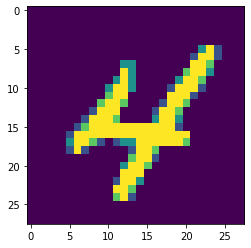

tensor(4)


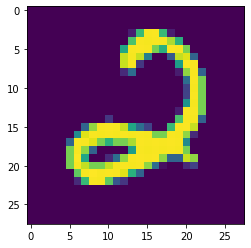

tensor(2)


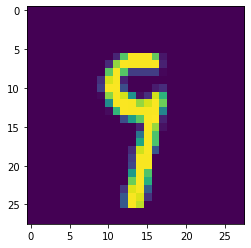

tensor(9)


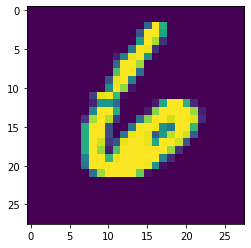

tensor(6)


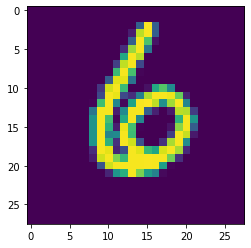

tensor(6)


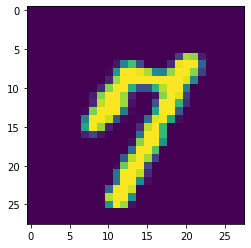

tensor(7)


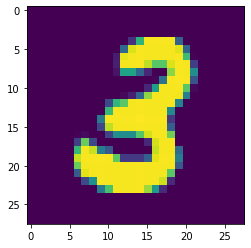

tensor(3)


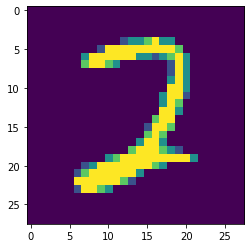

tensor(2)


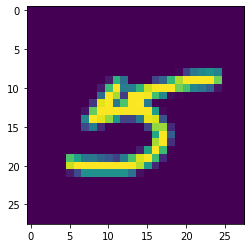

tensor(5)


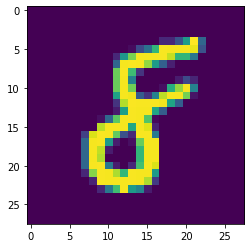

tensor(8)


In [22]:
for i in range(10):
    plt.imshow(X[i].view(28,28))
    plt.show()
    print(y[i])